# Week 2 exercises
# Part 1: Basic mathematical description of networks
## Questions

### *Chapter 1*
#### List three different real networks and state the nodes and links for each of them. 

Metabolic network :
* Nodes : molecules
* Links : chemical reactions

World wide web :
* Nodes : web documents
* Links : URLs

Social network :
* Nodes : individuals
* Links : relationships


#### Tell us of the network you are personally most interested in. Address the following questions: What are its nodes and links? How large is it? Can be mapped out? Why do you care about it? 

I am personally the most interested in the neural network and the approach we are currently using to try understand it (hybrid between neural networks for machine learning and the actual study of the brain system). 
The nodes are the neurons, and the links are the synapses by which neurons communicate by sending electrical or chemical signals. Our network is fairly large, with around [86 billion neurons (nodes) and $10^{14}$ synapses (links)](https://en.wikipedia.org/wiki/List_of_animals_by_number_of_neurons), which is impossible to map as it is. Several techniques exist to be able to visualize parts of the network, but it can't be mapped out as a whole. 

I care about it because I think that it can give us great insight into how brain works and how learning, decision making, and interactions work at a really low-level. As I am also studying neural networks in the context of machine learning, many ideas or at least explanations come from the field of brain research, and it is quite exciting to think we can replicate the way our brain learns. 

#### In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

To my mind, network science could have the biggest impact in the next decade in the field of autonomous transportation systems where all the transportation network (cars, buses, trains, etc.) would be interconnected to provide the most efficient way to go from a point A to a point B. 


### * Chapter 2 *

#### Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why?

We could take the example of the financial transaction network in the banking system, where each client has many (thousands) connections towards shops, internet retailers, service providers, other clients, the bank itself, etc. This network still has a high sparsity as not every client shops in the same place, has the same duties, the same spending scheme. 


# Part 2: The awesome NetworkX library
## NetworkX tutorial

In [198]:
%matplotlib inline 

Nodes in G : 
['A', 'C', 'B']
Edges in G : 
[('A', 'C'), ('A', 'B')]

Accessing edges
{'C': {}, 'B': {}}
{'time': 2}

Display selected edges and their weights
(1, 2, 0.400)
(3, 4, 0.375)

G graph attributes : 
{'day': 'The day for social graphs !'}

Node 1 of G properties : 
{'time': '11am'}
Node 1 of G properties : 
{'time': '1pm'}

Edge 1-2 of G properties : 
{'weight': 4.7}
Edge 1-2 of G properties : 
{'weight': 15}

Degree of node 1 in the DG digraph
0.5
1.25
[2]

Degree of each node
{1: 1.25, 2: 1.75, 3: 0.5}

K5 graph : 
[0, 1, 2, 3, 4]
[True, True, True, True, True]
\Compute clustering coefficients for graph G : 
{1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}


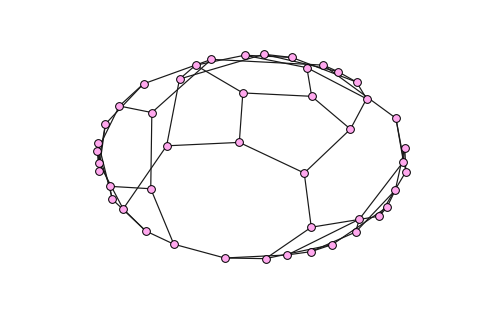

In [199]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

## Lets add nodes 
# Add a node 
G.add_node(1)

# Add multiple nodes
G.add_nodes_from([2,3])

# Add nodes from graph H to graph G 
H=nx.path_graph(10)
G.add_nodes_from(H)

# Add the graph H as a node in G
G.add_node(H)

## Now add edges 
# Add an edge from node 1 to 2
G.add_edge(1,2)
# Add an edge from node 1 to 3 and unpack it when supplying it to add_edge (can't feed in a tuple)
e=(2,3)
G.add_edge(*e)

# Add the edges from the H graph to the G graph
G.add_edges_from(H.edges())

# Remove the node H we added earlier on
G.remove_node(H)

G.clear()

# Add 3 nodes A, B, C
G.add_nodes_from("ABC") 
G.add_edge("A", "B")
G.add_edge("A", "C")

print "Nodes in G : "
print G.nodes()
print "Edges in G : "
print G.edges()

# Plot the graph
#nx.draw(G)
#plt.show()

print "\nAccessing edges"
# Accessing edge A prints the nodes to which is it connected 
print G["A"]

# Add some properties to the edge to display it afterwards 
G["A"]["B"]["time"] = 2
# Accessing the edge A to B properties
print G["A"]["B"]

print "\nDisplay selected edges and their weights"
# Create a new FG graph with weights, and output only the graphs that have weights < 0.5 
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.4),(1,3,0.6),(2,4,1.2),(3,4,0.375)])
## ERROR HERE : need to change the u,v,d to n, nbr otherwise the variables aren't defined 
for (n,nbr,d) in FG.edges(data='weight'):
    if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))
        
# Overwriting existing G graph 
G = nx.Graph(day="The day for social graphs !")
print "\nG graph attributes : "
print G.graph

# Add a node with a time attribute
G.add_node(1, time="11am")
print "\nNode 1 of G properties : "
print G.node[1]
G.node[1]["time"]="1pm"
print "Node 1 of G properties : "
print G.node[1]

# Add an edge with a weight property
G.add_edge(1, 2, weight=4.7)
print "\nEdge 1-2 of G properties : "
print G[1][2]
# Update the weight value and confirm its working 
G.edge[1][2]["weight"]=15
print "Edge 1-2 of G properties : "
print G.edge[1][2]

## Directed Graphs (digraph) ## 

# Create a digraph with weighted edges
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
print "\nDegree of node 1 in the DG digraph"
# Print the weight associated to the outgoing degree (the weight from 1 to 2 in our case - 0.5)
print DG.out_degree(1,weight='weight')
# Print the combined out and in degree (in terms of weights) of node 1 (out: 0.5, in: 0.75 -> 0.5 + 0.75 = 1.25)
print DG.degree(1,weight='weight')

# Print the successors of 1 (the neighbors function is the same as successors)
print DG.successors(1)

# Make graph undirected 
DG.to_undirected()

## MULTIGRAPHS ## 

# Create a multigraph with two edges between node 1 and 2 
MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])

print "\nDegree of each node"
print MG.degree(weight='weight')

## GENERATING GRAPHS ## 

# Create a Tutte graph 
tutte=nx.tutte_graph()

# Create a K5 graph
K_5=nx.complete_graph(5)
print "\nK5 graph : "
print K_5.nodes()
# Check that the degree of each node is K-1 (5-1 = 4)
print [K_5.degree(node) == 5-1 for node in K_5.nodes()]

## ANALYZING GRAPHS ## 

G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node("spam") 

print "\Compute clustering coefficients for graph G : "
print nx.clustering(G)

## PLOTTING ## 
# Plot the Tutte graph with pink nodes ! 
nx.draw(tutte, node_size=60, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()
# Save it to a file
plt.savefig('tutte.png')

### Exercise 2.1
#### Königsberg Problem 

#### Graph Representation 

Graph A:


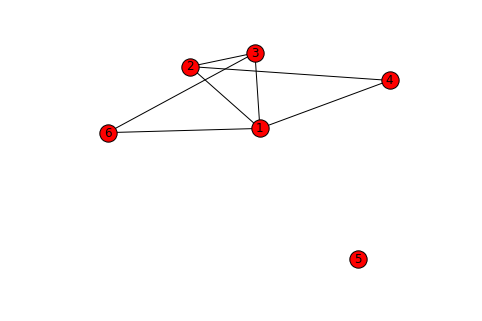

Graph B: 


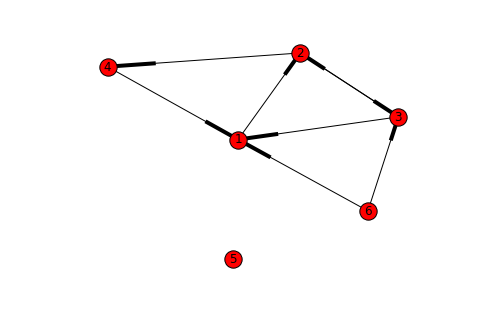

In [204]:
# Creating graph A
A = nx.Graph()
A.add_edges_from([(1,2), (1,3), (1,4), (1,6), (2,3), (2,4), (3,6)])
A.add_node(5)

print "Graph A:"
# Display it to check the general representation
nx.draw(A, with_labels=True)
plt.show()

# Creating graph B
B = nx.DiGraph()
B.add_edges_from([(1,2), (2, 3), (2,4), (3,2), (3,1), (4,1), (6,3), (6,1)])
B.add_node(5)

print "Graph B: "
# Display it to check the general representation
nx.draw(B, with_labels=True)
plt.show()

* Adjacency matrix

In [82]:
# Compute the adjacency matrix and convert it to dense format instead of the default sparse format
def compute_adjacency_matrix(G):
    adj_M = nx.adjacency_matrix(G).todense()
    return adj_M

print "Adjacency matrix for A:"
print compute_adjacency_matrix(A)
print "Adjacency matrix for B:"
print compute_adjacency_matrix(B)

Adjacency matrix for A:
[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
Adjacency matrix for B:
[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


* Link lists

In [83]:
# The link list of a graph is simply displayed by using the edges function from NetworkX
def get_link_list(G):
    return G.edges()

get_link_list(A)

[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

In [84]:
get_link_list(B)

[(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]

* Average clustering coefficient of the network A

In [85]:
# Prints the average clustering coefficient of the network A
nx.average_clustering(A)

0.6388888888888888

* If you switch the labels of nodes 5 and 6 in Image 2.20a, how does that move change the adjacency matrix? And the link list?

The adjacency matrix is affected as the original 5th row is now the 6th row and vice versa. Regarding the link list, instead of having the connections to the node 6, the connections are now with node 5. 

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]


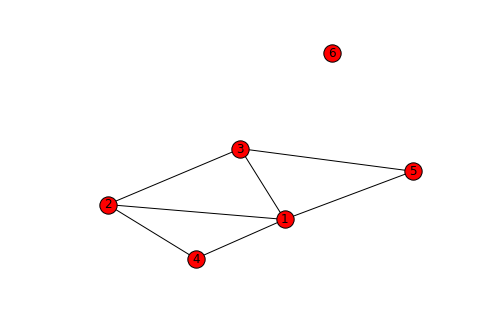

In [205]:
# Switch the labels of nodes 5 and 6 in graph A
A.remove_node(5)
A.remove_node(6)
A.add_node(6)
A.add_edges_from([(1,5), (3,5)])

print compute_adjacency_matrix(A)
print get_link_list(A)

nx.draw(A, with_labels=True)
plt.show()

* What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

You can't easily see whether the graph is a directed or undirected graph as you need to go through the list and check if you can see twice a node in the first and second position of at least two tuples. In the matrix, you can see this directly as it will be symmetric if it's undirected. You don't also get that intuitive lookup for a node that you get with the matrix : you can take any row or column and easily see its connections, whereas in a link list you need to go through the all list to gather all the connections. 

* In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

In [112]:
from numpy import linalg

# To compute the number of paths of length n from one node to another, you can compute the adjacency matrix to the power of n
# In this resulting matrix, at position (start, end), we get the number of paths of length n (theorem of graph theory)
def number_paths_length(M, start, end, length):
    # Retrieve the dense representation of the adjacency matrix
    adj_M = nx.adjacency_matrix(M).todense()
    
    # Elevate the matrix to the power of length
    adj_M_3 = linalg.matrix_power(adj_M, length)
    
    # Return the count by accessing the position (need to -1 as this is a typical array with indexing starting at 0)
    return adj_M_3[start-1, end-1]


print "Number of paths of length 3 in graph A from 1 to 3 : %d" % number_paths_length(A, 1, 3, 3)
print "Number of paths of length 3 in graph B from 1 to 3 : %d" % number_paths_length(B, 1, 3, 3)

Number of paths of length 3 in graph A from 1 to 3 : 7
Number of paths of length 3 in graph B from 1 to 3 : 0


#### Bipartite Networks 
* Construct its adjacency matrix. Why is it a block-diagonal matrix?

Is it considered to be a block-diagonal matrix as we can distringuish blocks (squares) around the diagonal that form sub-matrices

In [117]:
from networkx.algorithms import bipartite

# Construct graph 
C = nx.Graph()
C.add_nodes_from([1,2,3,4,5,6], bipartite=0)
C.add_nodes_from([7,8,9,10,11], bipartite=1)
C.add_edges_from([(1,7), (7,3), (8, 3), (2,9), (3,9), (9,4), (9,5), (4,10), (5,11), (11,6)])

In [118]:
# Print adjacency matrix
print compute_adjacency_matrix(C)

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


* Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

In [125]:
# Retrieve the two groups of nodes
purple_nodes, green_nodes = bipartite.sets(C)

# Get the projection for the green and purple nodes
C_proj_green = bipartite.projected_graph(C, green_nodes)
C_proj_purple = bipartite.projected_graph(C, purple_nodes)

print "Adjacency matrix for the projection of the green nodes : "
print compute_adjacency_matrix(C_proj_green)
print "Adjacency matrix for the projection of the purple nodes : "
print compute_adjacency_matrix(C_proj_purple)

Adjacency matrix for the projection of the green nodes : 
[[0 1 0 0 1]
 [1 0 1 1 1]
 [0 1 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]]
Adjacency matrix for the projection of the purple nodes : 
[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]


* Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

The formula for the average degree is : $\frac{2L}{N}$

In [142]:
def compute_average_degree(G):
    L = len(G.edges())
    N = len(G.nodes())
    return 2.*L/N

# From my understanding of the question, here we need to compute the average degree of the whole network (and after of each projection)
print "Average degree of the network : %f" % compute_average_degree(C)

Average degree of the network : 1.818182


* Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?

In [146]:
avg_degree_proj_green = compute_average_degree(C_proj_green)
avg_degree_proj_purple = compute_average_degree(C_proj_purple)

print "Average degree of the green nodes : %f" % avg_degree_proj_green
print "Average degree of the purple nodes : %f" % avg_degree_proj_purple

# Compute the average degree of both projections combined to test
avg_network_from_proj = (avg_degree_proj_green + avg_degree_proj_purple) / 2.
print avg_network_from_proj

Average degree of the green nodes : 2.000000
Average degree of the purple nodes : 2.666667
2.33333333333


It is not suprising that the values are different as when we project the nodes from each group new connections are created between each node of the projection based on their previous connections in the graph. This means we'll get higher connectivity between nodes when we look at each projection separately. 

# Part 3: Plotting degree distributions

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import networkx as nx

* Binning real numbers
    * Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution with μ=2μ=2 and σ=0.125σ=0.125.

In [157]:
# Generate 5000 random points from a Gaussian distribution with u = 2 o = 0.125
random_values = []
for i in range(0, 5000):
    random_values.append(random.gauss(2, 0.125))
# Take the 5 first values
print random_values[0:5]
# Check that the length is indeed 5000 
print len(random_values)

[1.9270054659820692, 1.9069662869881474, 1.965282411447406, 2.0691170033832513, 2.031111790078194]
5000


*  * Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?

In [181]:
hist, bin_edges = np.histogram(random_values, bins=10)

print "Length of the histogram : %d" % len(hist)
print "Length of the bin edges : %d" % len(auto_bin_edges)

Length of the histogram : 10
Length of the bin edges : 11


This function returns the histogram as an array and the automatically calculated bin edges for those values. 
The histogram array has the value of 10, corresponding to the 10 bins, but the bin_edges array has the value of 11 as it represents the intervals for each bin (the so-called "edges"), thus we have one more value as we defined for each bin the start and end position by taking the next element in the array as the end position. 

*   * Then we use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

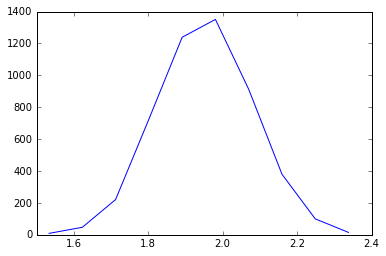

In [206]:
plt.plot(bin_edges[:-1], hist)
plt.show()

We exclude the last value of the bin_edges to get a length 10 array for the bin edges. 

* Binning integers
    * But binning real numbers into a fixed number of bins is easy when numpy.histogram does all the work and finds the right bin boundaries for you. Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out numpy also has some convenient random number generators. Use numpy.random.poission to generate 5000 numbers drawn from a Poisson distribution characterized by λ=10λ=10. Find the maximum and minimum value of your 5000 random numbers. 

In [186]:
# Generate the random values from a Poisson distribution
random_poisson_values = []
for i in range(0, 5000):
    random_poisson_values.append(np.random.poisson(10))

# Take the first 10 values
print random_poisson_values[:10]    

min_rand_value = min(random_poisson_values)
max_rand_value = max(random_poisson_values)

print "Minimum value : %d" % min_rand_value
print "Maximum value : %d" % max_rand_value

[14, 12, 10, 12, 12, 12, 7, 9, 8, 10]
Minimum value : 0
Maximum value : 25


*   * Instead of simplify specifying the number of bins for numpy.histogram, let's specify the bins we want using a vector. Create a vector that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

In [211]:
bins = [i for i in range(min_rand_value, max_rand_value+1)]

poisson_hist, poisson_bin_edges = np.histogram(random_poisson_values, bins=bins)

The sum over bin counts should be equal to the total count of number we generated in the first place (bin counts are only the number of occurences for each bin / interval) : 

In [212]:
print sum(poisson_hist) == 5000

True


When creating our bins, we supplied the minimum and maximum value of our random values geneated by the Poisson distribution, and we want our bins to reflect all the values between our min and max. 

* * Now, use a bar chart (matplotlib.pyplot.bar) to plot the distribution 

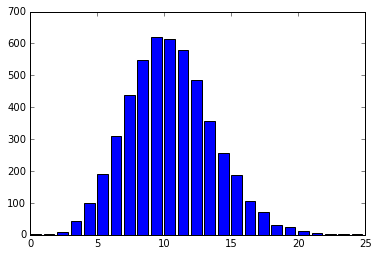

In [208]:
plt.bar(poisson_bin_edges[:-1], poisson_hist)
plt.show()

* Binning and plotting degree distributions. 
    * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. First we have to figure out which values the ER parameters (N and p) should assume. It's easy to see that N=5000, but how do you find p? Hint: The parameter λ in the Poisson distribution corresponds to the average degree, so you have to find a p that results in an average degree, k=10. And you know that ⟨k⟩=p(N−1), which will give you pp. Note that Python by default returns the result of divisions as the most precise of the datatypes involved (for instance, try computing 1/2 and 1.0/2.0 in your notebook). If you want division to always give you a decimal number, you can enter from __future__ import division at the beginning of your notebook.

In [1]:
N = 5000
k = 10
p = k / (N - 1.)

print p

0.00200040008002


* * Now, use networkx to create the graph and extract the degree distribution.

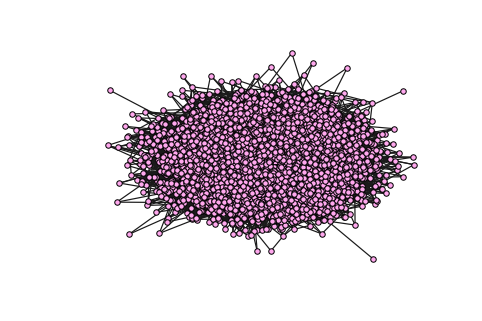

In [219]:
# Create the graph by using the built-in ER graph generator with the provided arguments
ER = nx.erdos_renyi_graph(N, p)

nx.draw_spring(ER, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

* * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

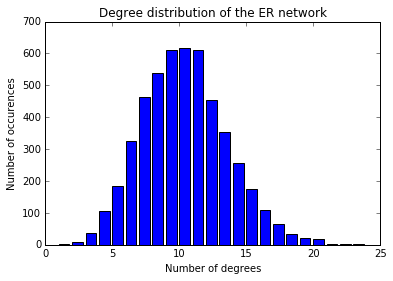

In [234]:
degree_values = sorted(nx.degree(ER).values())

bins = [i for i in range(min(degree_values), max(degree_values)+1)]
hist, bin_edges = np.histogram(degree_values, bins=bins)

plt.bar(bin_edges[:-1], hist)
plt.title("Degree distribution of the ER network")
plt.ylabel("Number of occurences")
plt.xlabel("Number of degrees")
plt.show()

It indeeds looks like the Poisson distribution we plotted from before

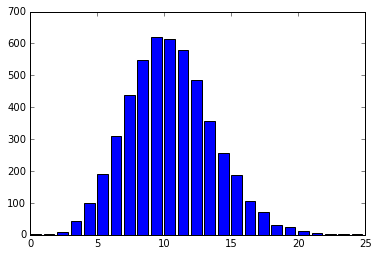

In [236]:
# Previous Poisson distribution
plt.bar(poisson_bin_edges[:-1], poisson_hist)
plt.show()

# Part 4: Random networks
### Erdős-Rényi Networks 

* What is the expected number of links, 〈L〉?

The expected number of links, $<L>$ is : 
$$ <L> = \frac{pN(N-1)}{2} $$
$$ <L> = \frac{0.001*3000(2999)}{2} $$ 

In [3]:
import numpy as np 

p = 1e-3
N = 3000

L = p*N*(N-1)/2.
print L

4498.5


* In which regime is the network?

$$ ⟨k⟩=p(N−1) $$ 

In [4]:
k = p * (N - 1)
print "Is k > 1 and k < ln(N) ? %r (%f)" % ((k > 1 and k < np.log(N)), k)
print "Is p > 1/N ? %r (%f)" % ((p > 1/N), p)

Is k > 1 and k < ln(N) ? True (2.999000)
Is p > 1/N ? True (0.001000)


The regime is supercritical since we have both requirements :  ⟨k⟩ > 1 and p › 1/N  but ‹k› < lnN (not in connected regime). 

* Calculate the probability pc so that the network is at the critical point

$$ p_C = \frac{1}{N} $$

In [10]:
p_cr = 1. / N
print p_cr

0.000333333333333


* Given the linking probability p = $10^{–3}$, calculate the number of nodes $N^{cr}$ so that the network has only one component.

$$ ⟨k⟩ > ln(N) $$

In [15]:
N_cr = 2/10**-3

#print k > np.log(N)

#N_cr = np.log(N)
print N_cr

2000.0


* For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

In [16]:
k_cr = p_cr * (N_cr - 1)

d_cr = np.log(N_cr) / np.log(k_cr)

print k_cr
print d_cr

0.666333333333
-18.7230379325


* Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [ ]:
poisson_vals = [np.random.poisson(k_cr) for i in range(5000)]

plt.plot(poisson_vals)

### Paths. 
* Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).

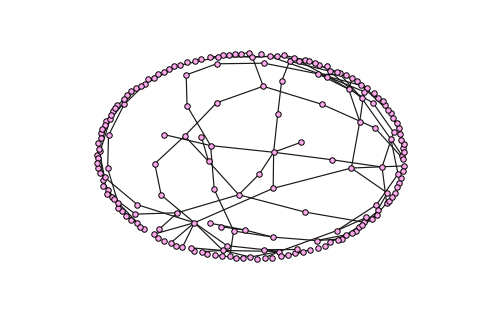

In [268]:
N = 200
k = 1.5

# Calculate the p parameter
p = k / (N - 1.)

# Create the ER network
random_network = nx.erdos_renyi_graph(N, p)

# Draw the network 
nx.draw(random_network, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

* Extract the Giant Connected Component, GCC. (Hint. You can use networkx.connected_component_subgraphs)

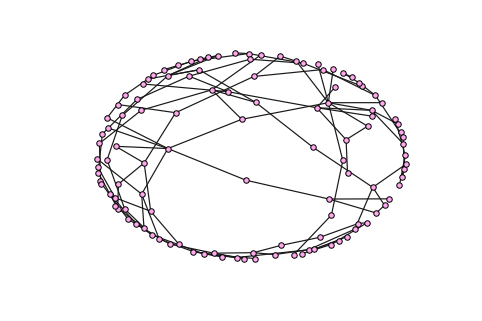

In [269]:
# Take the biggest connected component from the list of connected components
gcc = max(nx.connected_component_subgraphs(random_network), key=len)

# Display it 
nx.draw(gcc, node_size=30, node_color="#FFA8EE", node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()

* Choose a node at random from the GCC. (Hint: You may want to try random.choice.)

In [279]:
# Choose a random node in the list of nodes
n = random.choice(gcc.nodes())

# Print the label of the random node we found
print n

# Display its properties (if any)
print gcc.node[n]

92
{}


* Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)

In [292]:
# Get all paths of length 2 that start from node n in gcc 
paths = nx.single_source_shortest_path_length(gcc, n, cutoff=2)

# Display the paths of length 2 or less that we retrieved 
print paths

# For each of the paths retrieved (format : (node: length), only take those that are of length precisely 2)
nodes_2_steps_away_n = [node for node, length in paths.iteritems() if length == 2]

# Print the remaining nodes
print nodes_2_steps_away_n

115
{192: 2, 4: 1, 168: 2, 144: 1, 114: 2, 187: 2, 92: 0}
[192, 168, 114, 187]


* Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw and reading the documentation carefully find out how to color individual nodes.

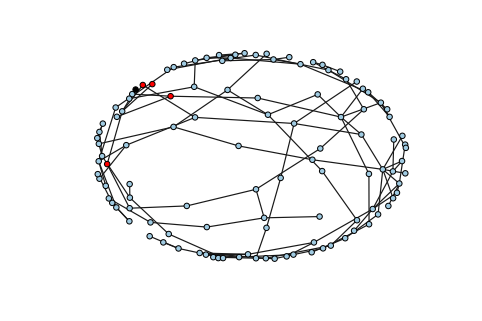

In [297]:
# Get all nodes in the GCC
gcc_nodes = gcc.nodes()

# By default, initialize the color of all nodes to blue
nodes_color = ["#A0CBE2" for node in gcc_nodes]

# For the random node we picked, color it in black
nodes_color[gcc_nodes.index(n)] = "#000000"

# For each node in the nodes that are 2 steps away from the random node, color them in red
for node in nodes_2_steps_away_n:
    nodes_color[gcc_nodes.index(node)] = "#ff0000"

# Draw the network by supplying the nodes_color array we just built 
nx.draw(gcc, node_size=30, node_color=nodes_color, node_shape='o', edge_color='.1', with_labels=False, width=1.2)
plt.show()